In [1]:
import os
import glob
import re

In [24]:
import numpy as np

In [2]:
result_notebooks = glob.glob("notebooks/v4/0315*")

In [3]:
read_results = {}
for notebook in result_notebooks:
    with open(notebook) as f:
        t = f.read()
        occ = [int(x) for x in re.findall("Within 1000 steps solved (\d+) problems out of 100", t)]
        read_results[notebook] = occ[::3]

In [4]:
read_results

{'notebooks/v4/0315_series5a_sr70_l30_aTrue_tng-tpu-pre-22.ipynb': [100,
  100,
  100,
  100,
  100,
  100,
  100,
  100,
  100,
  97,
  70,
  52,
  29],
 'notebooks/v4/0315_series5a_sr30_l30_aTrue_tng-tpu-00.ipynb': [100,
  100,
  100,
  100,
  100,
  100,
  100,
  100,
  99,
  95,
  58,
  47,
  21],
 'notebooks/v4/0315_series5a_sr100_l30_aTrue_tng-tpu-pre-29.ipynb': [100,
  100,
  100,
  100,
  100,
  100,
  100,
  100,
  94,
  74,
  48,
  32,
  15],
 'notebooks/v4/0315_series5a_sr30_l30_aTrue_tng-tpu-06.ipynb': [100,
  100,
  100,
  100,
  100,
  100,
  100,
  100,
  96,
  82,
  54,
  31,
  18],
 'notebooks/v4/0315_series5a_sr50_l40_aTrue_tng-tpu-pre-26.ipynb': [100,
  100,
  100,
  100,
  100,
  100,
  100,
  100,
  100,
  98,
  70,
  56,
  28],
 'notebooks/v4/0315_series5a_sr100_l30_aTrue_tng-tpu-pre-11.ipynb': [100,
  100,
  100,
  100,
  100,
  100,
  100,
  100,
  99,
  93,
  70,
  53,
  31],
 'notebooks/v4/0315_series5a_sr30_l30_aTrue_tng-tpu-pre-12.ipynb': [100,
  100,
  100,

In [5]:
import numpy

def series(num):
    x = []
    for key, val in read_results.items():
        if "series5a_sr" + str(num) in key:
            x.append(val)
    m = numpy.mean(x, axis=0)
    s = numpy.std(x, axis=0, ddof=1)
    return (m, s)

In [6]:
series(30)

(array([100. , 100. , 100. , 100. , 100. , 100. , 100. , 100. ,  97.2,
         86.8,  55.4,  39.2,  15.6]),
 array([0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 2.16794834, 4.96990946,
        4.21900462, 5.76194412, 3.97492138]))

In [7]:
series(50)

(array([100.        , 100.        , 100.        , 100.        ,
        100.        , 100.        , 100.        , 100.        ,
         98.33333333,  92.        ,  64.33333333,  45.33333333,
         23.66666667]),
 array([0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 2.081666  , 7.93725393,
        6.02771377, 9.29157324, 4.50924975]))

In [8]:
series(70)

(array([100.  , 100.  , 100.  , 100.  , 100.  , 100.  , 100.  , 100.  ,
         99.  ,  89.5 ,  60.75,  43.75,  21.75]),
 array([0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 1.15470054, 5.97215762,
        7.63216876, 6.02079729, 7.88986692]))

In [9]:
series(100)

(array([100.        , 100.        , 100.        , 100.        ,
        100.        , 100.        , 100.        , 100.        ,
         97.33333333,  82.33333333,  57.33333333,  42.        ,
         21.33333333]),
 array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  2.88675135,  9.71253486,
        11.37248141, 10.53565375,  8.50490055]))

In [10]:
def read_jw():
    read_results = {}
    for notebook in result_notebooks:
        with open(notebook) as f:
            t = f.read()
            occ = [int(x) for x in re.findall("Within 1000 steps solved (\d+) problems out of 100", t)]
            read_results[notebook] = occ[2::3]
    return read_results

In [11]:
jw = (numpy.mean(list(read_jw().values()), axis=0),
      numpy.std(list(read_jw().values()), axis=0, ddof=1))
print(jw)

(array([100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,  72.,
        36.,  11.]), array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]))


In [12]:
def read_dlis():
    read_results = {}
    for notebook in result_notebooks:
        with open(notebook) as f:
            t = f.read()
            occ = [int(x) for x in re.findall("Within 1000 steps solved (\d+) problems out of 100", t)]
            read_results[notebook] = occ[1::3]
    return read_results

In [13]:
dlis = ((numpy.mean(list(read_dlis().values()), axis=0)),
    (numpy.std(list(read_dlis().values()), axis=0, ddof=1)))
print(dlis)

(array([100., 100., 100., 100., 100., 100., 100., 100., 100.,  85.,  26.,
         7.,   2.]), array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]))


In [14]:
from matplotlib import pyplot as plt

In [15]:
print(len(dlis[0]))

13


In [38]:
ydlis = [dlis[0][0]] + [dlis[0][5]] + list(dlis[0][7:])
yjw = [jw[0][0]] + [jw[0][5]] + list(jw[0][7:])
ys30 = [series(30)[0][0]] + [100.] + list(series(30)[0][7:])
ys50 = [series(50)[0][0]] + [100.] + list(series(50)[0][7:])
ys70 = [series(70)[0][0]] + [100.] + list(series(70)[0][7:])
ys100 = [series(100)[0][0]] + [100.] + list(series(100)[0][7:])

In [39]:
ydlis

[100.0, 100.0, 100.0, 100.0, 85.0, 26.0, 7.0, 2.0]

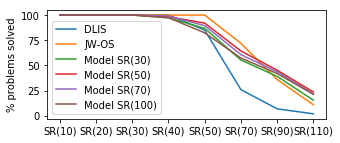

In [41]:
# x = [10, 12, 14, 16, 18, 20, 25, 30, 40, 50, 70, 90, 110]
x = np.arange(8)
xticks = ["SR({})".format(x) for x in [10, 20, 30, 40, 50, 70, 90, 110]]
plt.figure(figsize=(5, 2))
plt.plot(x, ydlis, '')
plt.plot(x, yjw, '')
plt.plot(x, ys30, '')
#plt.fill_between(x, series(30)[0] - series(30)[1], series(30)[0] + series(30)[1], alpha=0.1)
plt.plot(x, ys50, '')
#plt.fill_between(x, series(50)[0] - series(50)[1], series(50)[0] + series(50)[1], alpha=0.1)
plt.plot(x, ys70, '')
#plt.fill_between(x, series(70)[0] - series(70)[1], series(70)[0] + series(30)[1], alpha=0.1)
plt.plot(x, ys100, '')
#plt.fill_between(x, series(100)[0] - series(100)[1], series(100)[0] + series(30)[1], alpha=0.1)
plt.xticks(x, xticks)
plt.legend(['DLIS', 'JW-OS', 'Model SR(30)', 'Model SR(50)', 'Model SR(70)', 'Model SR(100)'])
plt.ylabel("% problems solved")
plt.savefig("sr-cutoff.pdf", bbox_inches = "tight")

In [195]:
series(40)

(nan, nan)

In [196]:
jw[0]

array([100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,  72.,
        36.,  11.])

In [197]:
series(100)[0]

array([100.    , 100.    , 100.    , 100.    , 100.    , 100.    ,
       100.    , 100.    ,  97.3333,  82.3333,  57.3333,  42.    ,
        21.3333])

In [198]:
def raw_data(num):
    x = []
    for key, val in read_results.items():
        if "series5a_sr" + str(num) in key:
            x.append(val)
    return x

In [199]:
raw_data(100)

[[100, 100, 100, 100, 100, 100, 100, 100, 94, 74, 48, 32, 15],
 [100, 100, 100, 100, 100, 100, 100, 100, 99, 93, 70, 53, 31],
 [100, 100, 100, 100, 100, 100, 100, 100, 99, 80, 54, 41, 18]]

In [200]:
list(jw[0])

[100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 72.0,
 36.0,
 11.0]

In [201]:
series(30)[1]

array([0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
       2.1679, 4.9699, 4.219 , 5.7619, 3.9749])

In [202]:
series(50)[1]

array([0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
       2.0817, 7.9373, 6.0277, 9.2916, 4.5092])

In [203]:
series(70)[1]

array([0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
       1.1547, 5.9722, 7.6322, 6.0208, 7.8899])

In [204]:
series(100)[1]

array([ 0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,
        0.    ,  2.8868,  9.7125, 11.3725, 10.5357,  8.5049])

In [216]:
series(30)[0]

array([100. , 100. , 100. , 100. , 100. , 100. , 100. , 100. ,  97.2,
        86.8,  55.4,  39.2,  15.6])